# Exercise 8.1: Chaos on a Strange Attractor

Lorenz used numerical integration to see what the trajectories would do in the long run. 

He studied the particular case: $\sigma = 10$, $b=8/3$, $r=28$. In what follows, we will also study the same parameters. 

The value of $r$ is just above the value of $r_H = \sigma(\sigma + b + 3)/(\sigma - b - 1) \simeq 24.74$. 

He began integrating from the initial condition $(x_0, y_0, z_0) = (0, 1, 0)$ close to the saddle point at the origin. 

(a) Plot $y(t)$ from $t=0$, to $t=100$.

You should see that after an initial transient, the solution settles into an irregular oscillation that persists as $t \rightarrow \infty$. 

(b) Lorenz discovered that a wonderful structure emerges if the solution is visualized as a trajectory in phase space.

Plot the trajectory of your solution in the $(x,z)$ phase space. You should see a "butterfly" pattern appearing. The trajectory appears to cross itself repeatedly, but that's just an artifact of projecting the 3D trajectory onto a 2D plane: in 3D, there are no self-intersections. 

This is a strange attractor, an attracting set of zero volume. 

## Exponential Divergence of Nearby Trajectories

The motion on the attractor exhibits a sensitive dependence on initial conditions. This means that two trajectories starting very close together will rapidly diverge from each other, and thereafter will have totally different futures. 
 
The practical implication is that long-term prediction becomes impossible in a system like this, where small uncertainties are amplified enormously fast. 

Suppose we let the transients decay, so that the trajectory is "on" the attractor. Suppose $\mathbf{x}(t)$ is a point on the attractor at time $t$, and consider a nearby point, say $\mathbf{x}(t) + \mathbf{\delta}(t)$, where $\mathbf{\delta}(t)$ is a tiny separation vector of initial length $|\mathbf{\delta_0}| \sim 10^{-7}$. Now watch $\mathbf{\delta}(t)$ grow. In numerical studies of the Lorenz attractor, one finds that:

$|\mathbf{\delta}(t)| \sim | \mathbf{\delta_0} | e^{\lambda t}$, where $\lambda >0$. Hence neighboring trajectories separate exponentially fast. 

(c) Plot $\log|\mathbf{\delta(t)}|$ versus $t$ and find the value of $\lambda$, also known as the Liapunov exponent. Focus on the region $t=1$ to $t=15$ to perform your straight line fit. 

Note that the curve is never exactly straight. The strength of the exponential divergence varies somewhat along the attractor. Also note that the exponential divergence must stop when the separation is comparable to the "diameter" of the attractor. 


## The Lorenz Map

(d) Lorenz found a beautiful way to analyze the dynamics on his strange attractor. He focused on $z_n$, the $n$-th *local maximum* of $z(t)$. 

Plot $z(t)$ versus $t$. 

(e) Lorenz had the idea that $z_n$ should predict $z_{n+1}$. 

Plot $z_{n+1}$ versus $z_n$. To find the maxima, you may use SciPy's functionality: 

```python
import numpy as np
from scipy.signal import argrelextrema

# generate an array with 100 random numbers:
x = np.random.random(100)

# get the indices that correspond to the local maxima:
maxima_indices = argrelextrema(x, np.greater)
```

The data from the chaotic time series appear to fall neatly on a curve, with almost no "thickness to the graph". 

The function $z_{n+1} = f(z_n)$ is now known as the *Lorenz map*. 


## Solution (a)

We already wrote the Runge-Kutta solver, so we mostly just have to define the Lorenz equation and feed in the data to matplotlib.

In [13]:
import numpy as np
import scipy as sp
from scipy.signal import argrelextrema
import matplotlib.pyplot as plt

In [16]:
sigma = 10 # the physical constants associated with the system we are analyzing
b = 8/3
r = 28

def l1(t,x): # the Lorenz equations
    return sigma*(x[1]-x[0])
def l2(t,x):
    return r*x[0]-x[1]-x[0]*x[2]
def l3(t,x):
    return x[0]*x[1]-b*x[2]

def lorenz(t,x):
    return np.array([l1(t,x),l2(t,x),l3(t,x)]) # vector map whose component functions are the Lorenz equations

Below is the implementation of the fourth order Runge-Kutta method that I wrote in the lectures.

In [17]:
def rk4(t0,x0,t,func,h): # a fourth order Runge-Kutta solver that propagates from t0 to t in the input space the function func starting at the value x0 and with a step size h
    
    ti = t0 # the initial x value
    xi = x0 # the initial y value
    
    tiList = [t0] # x values in iteration
    xiList = [x0] # y values in iteration
    
    n = int((t-t0)/h)

    for i in range(n):
        k1 = h*func(ti,xi)
        k2 = h*func(ti+h/2,xi+k1/2)
        k3 = h*func(ti+h/2,xi+k2/2)
        k4 = h*func(ti+h,xi+k3)
        xi = xi + 1/6*(k1+2*k2+2*k3+k4)
        ti = ti + h
        tiList.append(ti)
        xiList.append(xi)
    
    return (tiList,xiList) # returns two lists: the first is the grid of inputs and the second is the list of outputs

Let us solve the Lorenz equations using our Runge-Kutta method.

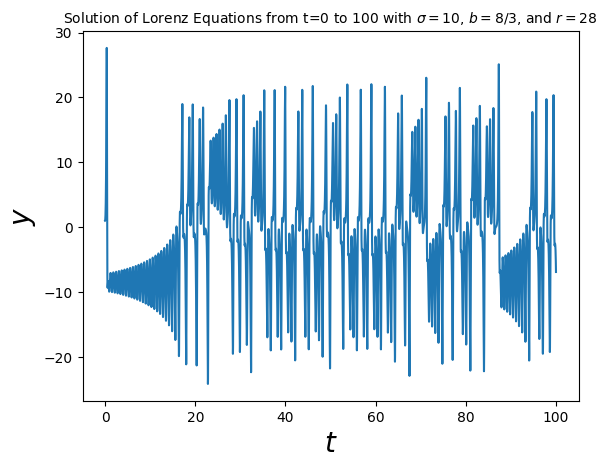

In [18]:
fig, ax = plt.subplots()

init = np.array([0,1,0])
var = rk4(0,init,100,lorenz,.01) # the numerical solution

tList = var[0] # input grid
yList = [] # the list of outputs
for i in var[1]:
    yList.append(i[1])

ax.set_xlabel(r'$t$', fontsize=20) # the t label
ax.set_ylabel(r'$y$', fontsize=20) # the y label
ax.set_title(r'Solution of Lorenz Equations from t=0 to 100 with $\sigma=10$, $b=8/3$, and $r=28$', fontsize=10) # the plot title 

ax.plot(tList,yList)

## Solution (b)



We just do the same thing we did before but again this time.

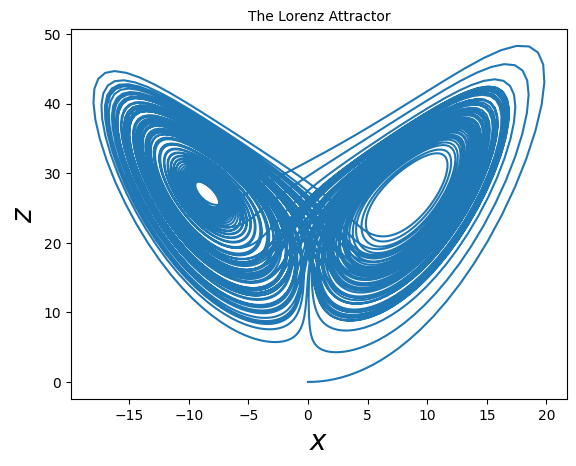

In [19]:
fig, ax = plt.subplots()

xList = [] # the list of x values
for i in var[1]:
    xList.append(i[0])
zList = [] # the list of z values
for i in var[1]:
    zList.append(i[2])

ax.set_xlabel(r'$x$', fontsize=20) # the t label
ax.set_ylabel(r'$z$', fontsize=20) # the y label
ax.set_title(r'The Lorenz Attractor', fontsize=10) # the plot title 

ax.plot(xList,zList)

## Solution (c)

We define the initial deviation in the systems in phase space by the array ```initDev```. We let these systems evolve in time according the the Runge-Kutta function ```rk4``` that was defined earlier. The trajectory of the original system is held in the previously-defined ```var``` array, while the perturbed trajectory is held in ```varp``` (for **var**iables **p**rime). The deviation between the trajectories is stored in the list ```devs``` using the ```normE``` function, which takes the Euclidean norm of the difference in trajectory points. Because

$||\delta(t)||\sim||\delta_0||e^{\lambda t}\implies\log\dfrac{||\delta(t)||}{||\delta_0||}=\lambda t$,

we convert ```devs``` to an array, divide by the initial deviation, and then take the logarithm. This ought to produce a linear plot with the slope being the Liapunov exponent $\lambda$.

We were asked to first evolve the system to the attractor, and then plot from $t=1$ to $15$. Looking at the plot from part (a), we see that the system evolves well into the attractor by $t=20$. I therefore decided to condsider the data from $t=21$ to $35$.

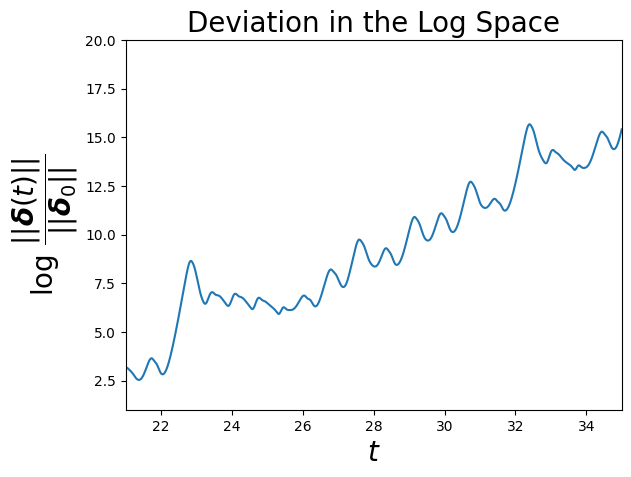

In [21]:
initDev = np.array([1E-7,0,0]) # the initial deviation in the position of the system in phase space

def normE(vec): # returns the Euclidean norm of a vector vec
    magSq = 0
    for i in vec:
        magSq = magSq + i**2
    return np.sqrt(magSq)

varp = rk4(0,init+initDev,100,lorenz,.01) # the perturbed system, this is precisely the same as var except we have added initDev to the initial conditions init

devs = [] # the deviation in the paths at each time on the interval [0,100]
for i in range(len(var[0])):
    devs.append(normE(var[1][i]-varp[1][i]))
logDevs = np.log(np.array(devs)/normE(initDev))

fig, ax = plt.subplots()

tList = var[0]

ax.set_xlabel(r'$t$', fontsize=20) # the t label
ax.set_ylabel(r'$\log\,\dfrac{||\boldsymbol{\delta}(t)||}{||\boldsymbol{\delta}_0||}$', fontsize=20) # the y label
ax.set_title(r'Deviation in the Log Space', fontsize=20) # the plot title 

ax.set_xlim(21,35)
ax.set_ylim(1,20)

ax.plot(tList,logDevs)

We now generate a linear fit of this data using ```scipy.optimize.curve_fit```. We need only those times and deviations that are within the above window. So we define new lists ```tWindow``` and ```devWindow``` by slicing ```tList``` and ```devList``` according to the endpoints of the above plot. Because the step size in the Runge-Kutta method was .01, we simply multiply the temporal enpoints of the plot by 100 to get the indices of the correspoding data.

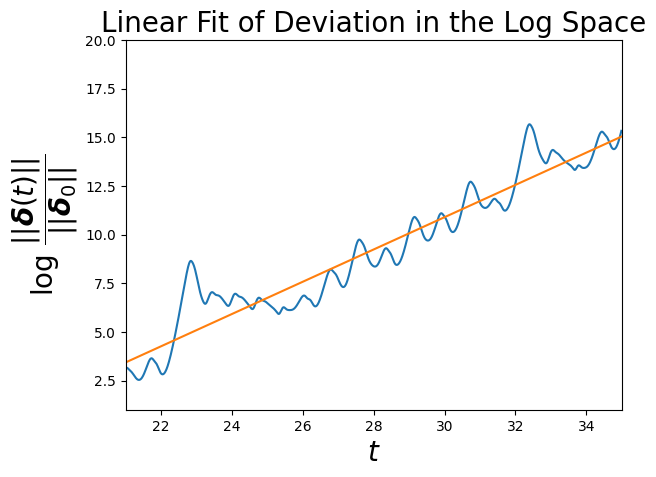

In [26]:
t0 = 2100 # initial t value of the data under consideration
t = 3500 # final t value of the data under consideration

def line(x,a,b): # a linear function with slope a and intercept b, where a,b are to be determined by a fit to the above data
    return a*x+b
    
tWindow = var[0][a:b] # the times we are concerned with
devWindow = logDevs[a:b] # the corresponding deviations

params = sp.optimize.curve_fit(line,tWindow,devWindow)[0] # the optimized slope and intercept of the linear fit of the logarithm of the deviations
fit = []
for t in tWindow:
    fit.append(params[0]*t+params[1]) # the optimized linear fit

fig, ax = plt.subplots()

ax.set_xlabel(r'$t$', fontsize=20) # the t label
ax.set_ylabel(r'$\log\,\dfrac{||\boldsymbol{\delta}(t)||}{||\boldsymbol{\delta}_0||}$', fontsize=20) # the y label
ax.set_title(r'Linear Fit of Deviation in the Log Space', fontsize=20) # the plot title 

ax.set_xlim(21,35)
ax.set_ylim(1,20)

ax.plot(tWindow,devWindow)
ax.plot(tWindow,fit)

Now we print out the Liapunov exponent.

In [9]:
print("The Liapunov exponent is", round(params[0],3))

The Liapunov exponent is 0.829


## Solution (d)

We already have the lists ```tList``` and ```zList``` filled with the requisite values.

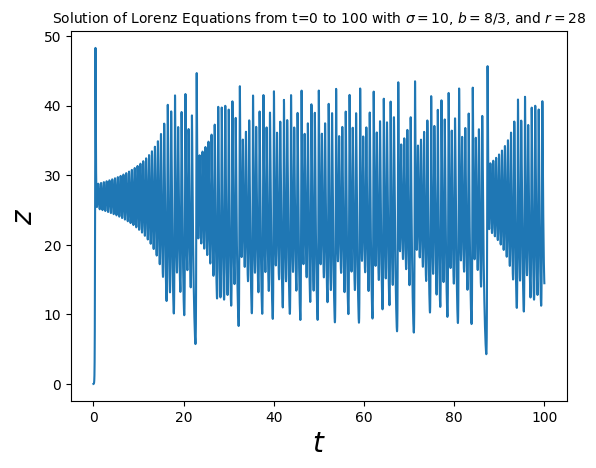

In [28]:
fig, ax = plt.subplots()

ax.set_xlabel(r'$t$', fontsize=20) # the t label
ax.set_ylabel(r'$z$', fontsize=20) # the y label
ax.set_title(r'Solution of Lorenz Equations from t=0 to 100 with $\sigma=10$, $b=8/3$, and $r=28$', fontsize=10) # the plot title 

ax.plot(tList,zList)

## Solution (e)

This is mostly simple with the ```argrelextrema``` function. We act on the list of z values with ```argrelextrema``` to generate the list of stationary points, which we then use to collect the maxima into a list ```maxima```. We then create two lists: one containing all the maxima except the last, and another containing all the maxima except the first. These are ```znList``` and ```znNextList```, with obvious notation.

The problem is that these lists are not ordered, as should be obvious from the above plot. We need a way to sort two lists simultaneously, according to the sorting of one of the lists. This is achieved via the ```zip``` function, which I found from https://stackoverflow.com/questions/9764298/given-parallel-lists-how-can-i-sort-one-while-permuting-rearranging-the-other.

We then plot the sorted data to get the clean curve below.

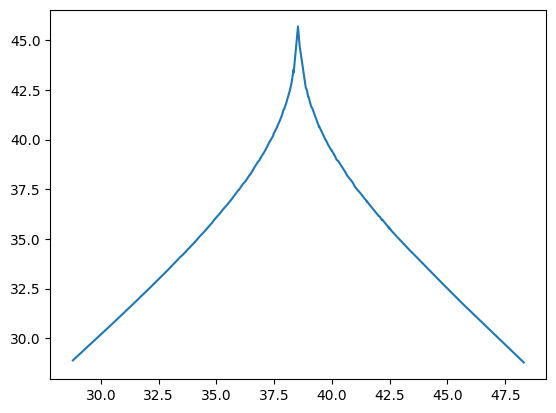

In [30]:
maximaIndices = argrelextrema(np.array(zList), np.greater) # the positions of the local maxima

maxima = [] # the local maxima
for i in maximaIndices[0]:
    maxima.append(zList[i])

znList = maxima[0:len(maxima)-1] # if we want to plot the n+1th maximum against the nth maximum, we have to remove the last nth maximum and first n+1th maximum from our consideration
znNextList = maxima[1:len(maxima)]

znList, znNextList = zip(*sorted(zip(znList, znNextList))) # this simultaneuosly sorts both lists according to a numerical sort of znList, I took it from a StackExchange post

fig, ax = plt.subplots()

ax.plot(znList,znNextList)